(429435, 67)


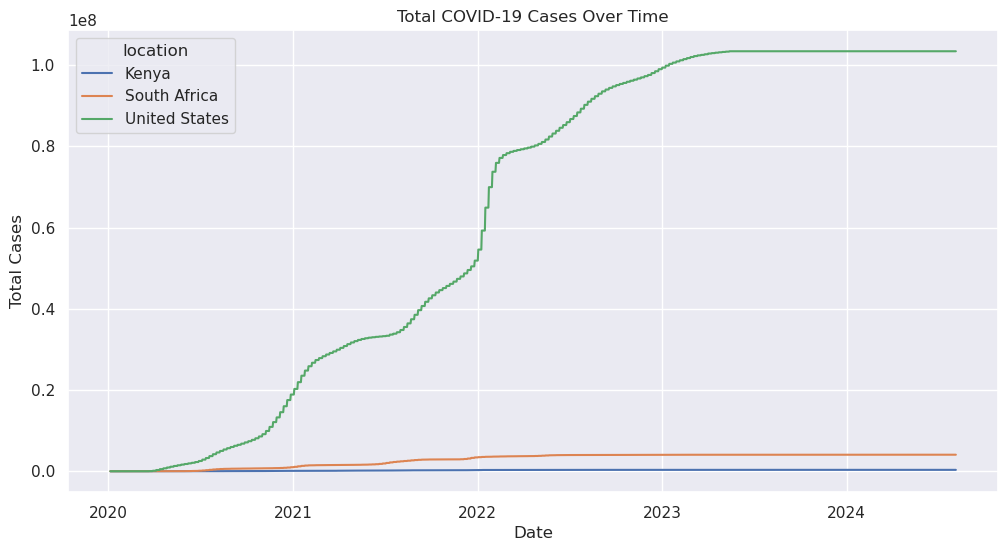

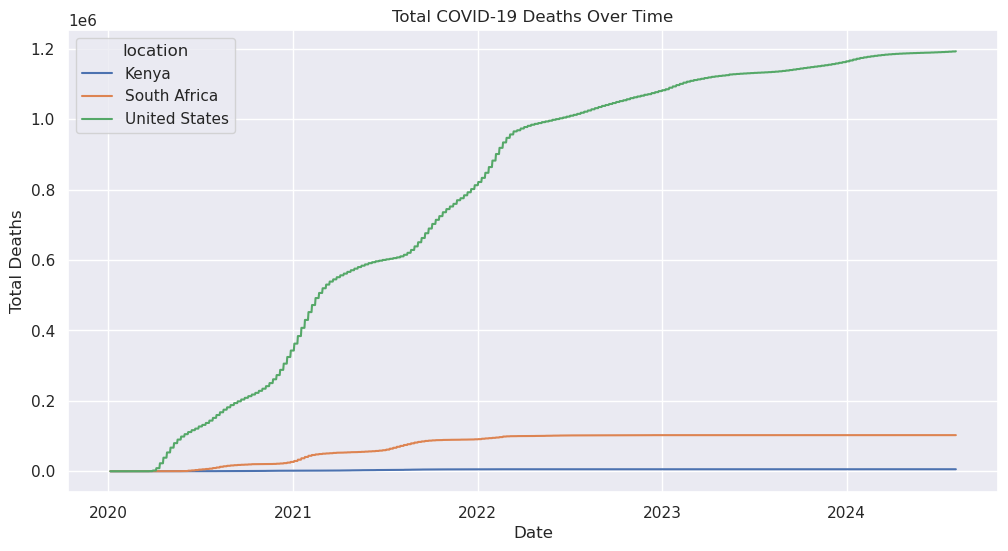

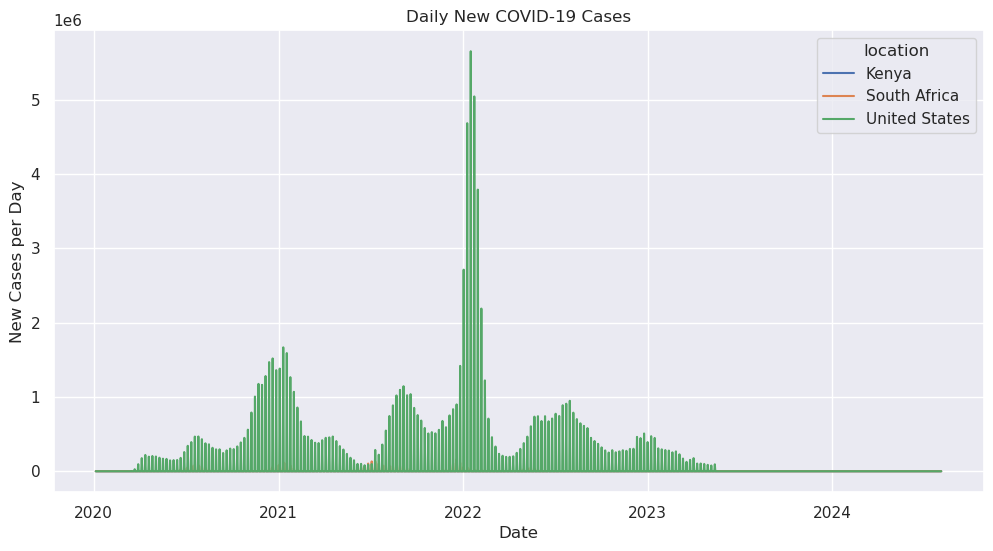

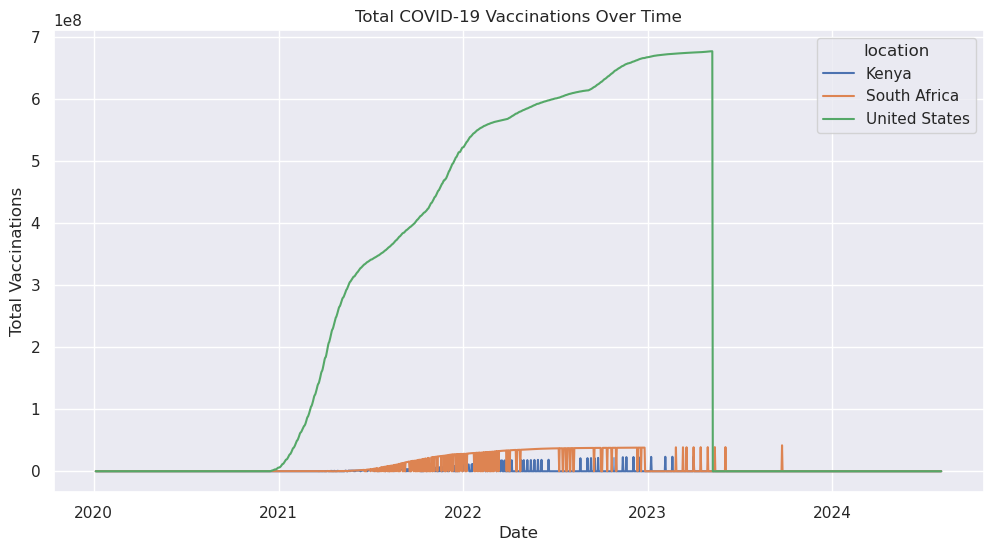

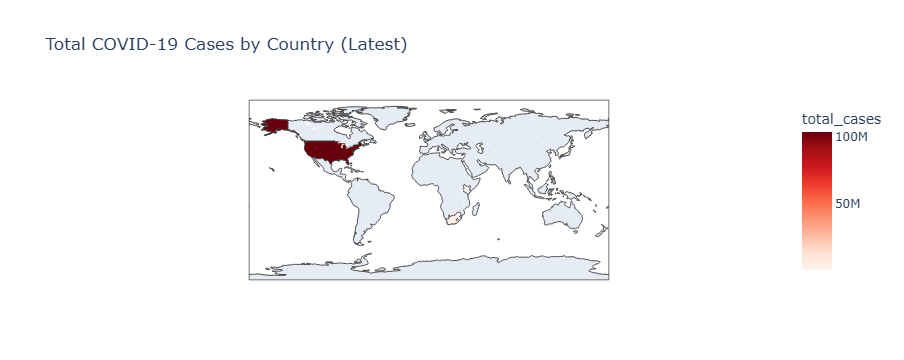

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot style
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load Dataset
df = pd.read_csv('owid-covid-data.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Preview dataset
print(df.shape)
df.head()

# Data Cleaning

# Focus on selected countries
countries = ['Kenya', 'United States', 'South Africa']
df = df[df['location'].isin(countries)].copy()

# Fill missing numeric values
columns_to_fill = ['total_cases', 'total_deaths', 'total_vaccinations', 'new_cases', 'new_deaths']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

# Calculate death rate
df['death_rate'] = df.apply(lambda row: row['total_deaths'] / row['total_cases'] if row['total_cases'] > 0 else 0, axis=1)

# Preview cleaned data
df[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']].head()

# EDA - Cases & Deaths Over Time

# Line plot: Total cases over time
plt.figure()
sns.lineplot(data=df, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.ylabel('Total Cases')
plt.xlabel('Date')
plt.show()

# Line plot: Total deaths over time
plt.figure()
sns.lineplot(data=df, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time')
plt.ylabel('Total Deaths')
plt.xlabel('Date')
plt.show()

# Daily New Cases Comparison

plt.figure()
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases')
plt.ylabel('New Cases per Day')
plt.xlabel('Date')
plt.show()

# Visualizing Vaccination Progress

# Line plot: Total vaccinations over time
plt.figure()
sns.lineplot(data=df, x='date', y='total_vaccinations', hue='location')
plt.title('Total COVID-19 Vaccinations Over Time')
plt.ylabel('Total Vaccinations')
plt.xlabel('Date')
plt.show()

# Choropleth Map (Latest Data)

# Get latest data for each country
latest_df = df.sort_values('date').groupby('location').tail(1)

# Plot cases per country
fig = px.choropleth(
    latest_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title="Total COVID-19 Cases by Country (Latest)"
)
fig.show()


In [ ]:
Insights & Reporting
1. COVID-19 Case Progression:
United States experienced the highest total number of COVID-19 cases compared to Kenya and South Africa, which can be attributed to its larger population and early widespread transmission.

South Africa and Kenya saw a much slower increase in total cases compared to the United States, though South Africa’s total cases rose significantly in certain periods.

2. Total Deaths:
United States also reported the highest number of total deaths. However, the death rate in South Africa is notably higher than the United States and Kenya, which could point to differences in healthcare systems or testing accuracy.

3. Daily New Cases:
During the peak periods of COVID-19 waves, all three countries showed large spikes in new daily cases, with Kenya showing a later spike compared to South Africa and the United States, which had earlier surges.

4. Vaccination Progress:
United States led the charge in terms of the total number of vaccinations, reflecting a quicker vaccine rollout compared to South Africa and Kenya.

South Africa began vaccinating later, but showed significant progress in mid-2021, with cases of vaccine hesitancy affecting the overall rate of vaccination.

5. Choropleth Map - Latest Cases:
The choropleth map clearly highlights the United States as having the most significant burden of COVID-19 cases compared to South Africa and Kenya, which reflects their respective outbreak levels as of the most recent data.

Conclusion
This analysis highlights the significant differences in COVID-19 trends across the three countries, including cases, deaths, and vaccination progress. While the United States experienced the highest overall impact, South Africa and Kenya's data reflect more controlled growth, though healthcare access and vaccine rollout remain key factors.

